In [14]:
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import auth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
auth.authenticate_user()
client = bigquery.Client(project='dj-ds-marketdata-nonprod')

In [21]:
sql = """
select *
from dj-ds-marketdata-nonprod.reporting.rep_RS_comparison
where ibd_file_date = (select max(ibd_file_date) from dj-ds-marketdata-nonprod.reporting.rep_RS_comparison) AND
scr_RsRank is not null and RsRank_delta_pct is not null and RsRank_delta_pct <=3

"""

df = client.query_and_wait(sql).to_dataframe()

In [17]:
df.head()

,ibd_Osid,ibd_Coname,ibd_Symbol,ibd_Rlst,scr_Osid,scr_RsRank,RsRank_delta_val,RsRank_delta_val_ABS,RsRank_delta_pct,RsRank_delta_pct_ABS,Varasto_populated,scr_VarastoDate,scr_SourceEnv,ibd_file_date,ibd_rep_Date,scr_rep_Date
0,23487,Equity Commonwealth,EQC,89,23487,1,-88,88,-0.988764,0.988764,Yes,2025-02-14,STG,2025-02-14,2025-02-16 04:02:46.370387,2025-02-17
1,81739,T-Rex 2X Lg MSTR Dly Tgt,MSTU,98,81739,5,-93,93,-0.948980,0.948980,Yes,2025-02-14,STG,2025-02-14,2025-02-16 04:02:46.370387,2025-02-17
2,75393,FAT Brands Inc Cl A,FAT,84,75393,8,-76,76,-0.904762,0.904762,Yes,2025-02-14,STG,2025-02-14,2025-02-16 04:02:46.370387,2025-02-17
3,81924,Alpha Cognition Inc,ACOG,74,81924,8,-66,66,-0.891892,0.891892,Yes,2025-02-14,STG,2025-02-14,2025-02-16 04:02:46.370387,2025-02-17
4,80659,YieldMax COIN Opt IncStr,CONY,78,80659,9,-69,69,-0.884615,0.884615,Yes,2025-02-14,STG,2025-02-14,2025-02-16 04:02:46.370387,2025-02-17


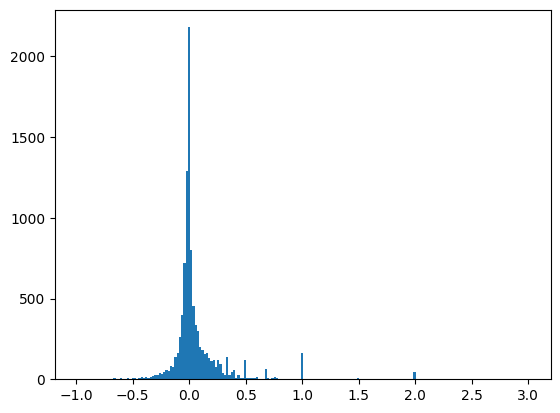

In [22]:
plt.hist(df['RsRank_delta_pct'],bins=200)
plt.show()